In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
data = pd.read_excel("Superstore Dataset.xlsx")

categories = data.groupby(['Sub-Category'])['Sales'].sum()
categories = pd.DataFrame(categories)

-3.1281311312860915
0.02454019820746381


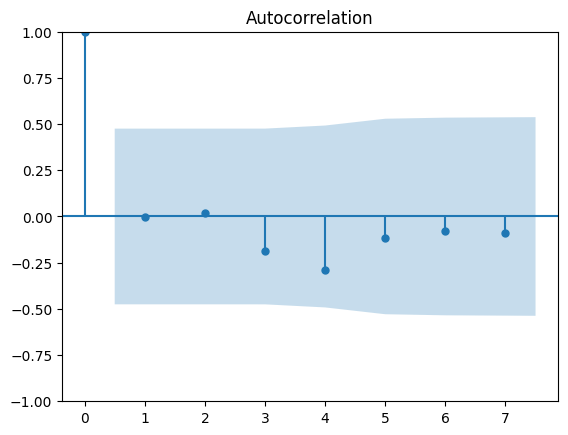

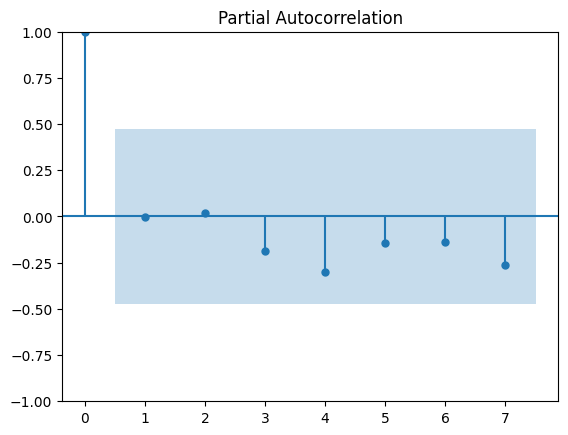

In [5]:
result = adfuller(categories['Sales'])
print(result[0])
# If this is less than 0.05, then our data is stationary.
print(result[1])

plot_acf(categories['Sales'], lags=7)
plot_pacf(categories['Sales'], lags=7)
plt.show()

Our biggest lag is both 0. So our p = 0, q = 0. There was no differencing needed to make our data stationary, hence our d = 0.

                            Sales
Sub-Category Order Date          
Accessories  2014-01-09    31.200
             2014-01-13   646.740
             2014-01-15   149.950
             2014-02-01   468.900
             2014-02-07   115.360
...                           ...
Tables       2024-12-10  1669.600
             2024-12-11   721.875
             2024-12-14   974.988
             2024-12-22  1529.306
             2024-12-25   273.060

[15712 rows x 1 columns]


/Users/cyrus/projects/hackathons/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/cyrus/projects/hackathons/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/cyrus/projects/hackathons/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                15712
Model:                          ARIMA   Log Likelihood             -126521.278
Date:                Fri, 07 Jun 2024   AIC                         253046.555
Time:                        16:04:21   BIC                         253061.879
Sample:                             0   HQIC                        253051.628
                              - 15712                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        324.9271      8.705     37.324      0.000     307.865     341.990
sigma2      5.778e+05    913.270    632.685      0.000    5.76e+05     5.8e+05
Ljung-Box (L1) (Q):                 509.45   Jarque-

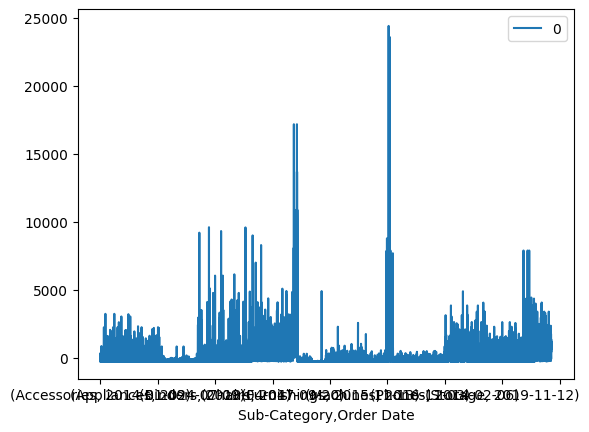

<Figure size 7000x1000 with 0 Axes>

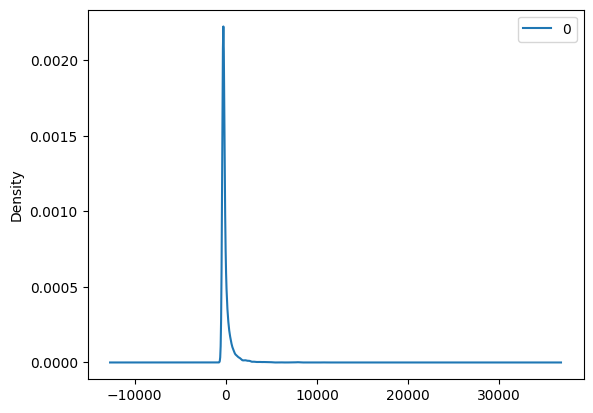

In [20]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

test = test.groupby(['Sub-Category', 'Order Date'])['Sales'].sum()
test = pd.DataFrame(test)

train = train.groupby(['Sub-Category', 'Order Date'])['Sales'].sum()
train = pd.DataFrame(train)
print(train)


model = ARIMA(train['Sales'], order=(0,0,0))

results=model.fit()
print(results.summary())

resid = pd.DataFrame(results.resid)
resid.plot()
plt.figure(figsize=(70,10))
plt.show()
# density plot of residuals
resid.plot(kind='kde')
plt.show()
